In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings
warnings.filterwarnings('ignore')

In [78]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

student = pd.read_sql_query('select * from studentsperformance',con=engine)

engine.dispose()

In [52]:
student.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [79]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

jb_stats = jarque_bera(student["math score"])
norm_stats = normaltest(student["math score"])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(student["reading score"])
norm_stats = normaltest(student["reading score"])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(student["writing score"])
norm_stats = normaltest(student["writing score"])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 15.912256686712709 and p value is 0.0003505075386818213
Normality test statistics is 15.408960513931822 and p value is 0.00045080293869937836
Jarque-Bera test statistics is 11.383300575987892 and p value is 0.0033740202672214448
Normality test statistics is 11.11741279628622 and p value is 0.003853758403576582
Jarque-Bera test statistics is 13.98509448257235 and p value is 0.0009187033894586527
Normality test statistics is 13.606450837263859 and p value is 0.0011101885439899974


Then results of both Jarque-Bera and Normal test showed that the distribution of exam scores are statistically different from the normal distribution. Therefore, the distribution of exam scores are not normal and they need to be transformed 

In [92]:
student['math_score'] = student[(student['math score'] > 0)]['math score']

In [93]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
math_score                     999 non-null float64
dtypes: float64(1), int64(3), object(5)
memory usage: 70.4+ KB


In [99]:
from scipy.stats import boxcox

math_score_boxcox,_ = boxcox(student[(student['math score'] > 0)]['math score'])
reading_score_boxcox,_ = boxcox(student["reading score"])
writing_score_boxcox,_ = boxcox(student["writing score"])

In [100]:
jb_stats = jarque_bera(math_score_boxcox)
norm_stats = normaltest(math_score_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(reading_score_boxcox)
norm_stats = normaltest(reading_score_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(writing_score_boxcox)
norm_stats = normaltest(writing_score_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 1.720098104874378 and p value is 0.4231413256953709
Normality test statistics is 1.8323073377495822 and p value is 0.40005482895717037
Jarque-Bera test statistics is 4.119778575331906 and p value is 0.1274680814024559
Normality test statistics is 5.282274611852865 and p value is 0.07128015609575467
Jarque-Bera test statistics is 4.746478090040098 and p value is 0.09317842784055597
Normality test statistics is 6.267311355043339 and p value is 0.04355827085023795


After applying Box-Cox transformation, the distributions of exams scores are more normal according to Jarque-Bera and Normality tests. The only exception was the Normality test of the writng scores which failed and it was significantly different from normal distribution. 

In [103]:
col = student.loc[:, "math score":"writing score"]
student["avg_exam_score"] = col.mean(axis=1)

In [104]:
jb_stats = jarque_bera(student["avg_exam_score"])
norm_stats = normaltest(student["avg_exam_score"])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 15.453387913085168 and p value is 0.00044089934264401887
Normality test statistics is 15.186721327231322 and p value is 0.0005037851534494478


Both tests showed that the new variable distribution is not normal.

In [105]:
avg_exam_score_boxcox,_ = boxcox(student["avg_exam_score"])

jb_stats = jarque_bera(avg_exam_score_boxcox)
norm_stats = normaltest(avg_exam_score_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 2.4353987431906026 and p value is 0.29591016374203183
Normality test statistics is 2.779857245981238 and p value is 0.2490930835165177


After applying Box-Cox transformation, the new variable distribution is normal now.

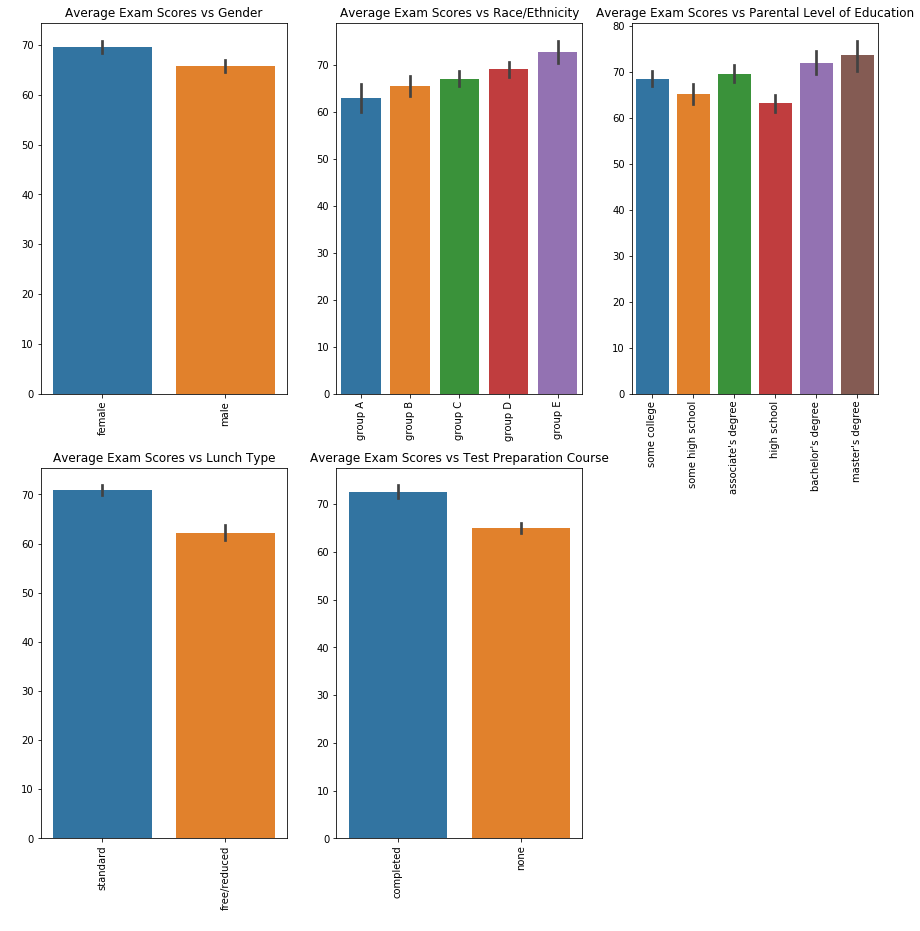

In [117]:
student = student.sort_values(['race/ethnicity']).reset_index(drop=True)

plt.figure(figsize=(15, 15))

plt.subplot(2, 3, 1)
ax = sns.barplot(student["gender"], student["avg_exam_score"])
plt.title("Average Exam Scores vs Gender")
plt.xticks(rotation="vertical")
ax.set(xlabel=" ", ylabel=" ")

plt.subplot(2, 3, 2)
ax = sns.barplot(student["race/ethnicity"], student["avg_exam_score"])
plt.title("Average Exam Scores vs Race/Ethnicity")
plt.xticks(rotation="vertical")
ax.set(xlabel=" ", ylabel=" ")

plt.subplot(2, 3, 3)
ax = sns.barplot(student["parental level of education"], student["avg_exam_score"])
plt.title("Average Exam Scores vs Parental Level of Education")
plt.xticks(rotation="vertical")
ax.set(xlabel=" ", ylabel=" ")

plt.subplot(2, 3, 4)
ax = sns.barplot(student["lunch"], student["avg_exam_score"])
plt.title("Average Exam Scores vs Lunch Type")
plt.xticks(rotation="vertical")
ax.set(xlabel=" ", ylabel=" ")

plt.subplot(2, 3, 5)
ax = sns.barplot(student["test preparation course"], student["avg_exam_score"])
plt.title("Average Exam Scores vs Test Preparation Course")
plt.xticks(rotation="vertical")
ax.set(xlabel=" ", ylabel=" ")

plt.show()

Since all the other variables in the dataframe where categorical, the best way to compare a continous variable like (avg_exam_score) to them is bar plot.

1. Females score higher than males in average. Gender migh be related to the new variable.

2. Ethnicity is related to the new variable. the average score is the lowest for ethnicity "A" and gradually increase to the maximum with ethnicity "E". 

3. Eventhough the plot did not show it clearly due to the ordering of the values of the x axis, but the level of parents education plays a role here. As the parents level of education goes higher, the everage exams score of the students goes higher.

4. The students who have  a standard lunch type receive huigher scores than the students with reduced/free meals.

5. The students who completed a test preparation course scored higher than the students who did not take or complete the course.

All these varibales are related to the average exam score, but we need to be careful, becuase all these variables might be an effect of another variable.

level of household income might be an important variable that caused all this variables to correlate with the average exam score. Ethnicity could not be the reason but the level of income varies by ethnicity and the difference of scores by ethnicity could be due to different level of household income. the same thing could be elaborated for the lunch type and test preparation course. The level of parent s education could not be the reason but might be the level of income. In general, as the education elevel increase the level of income increases as well. Gender might not be affected by the level of income but we need to check if the distribution of student gender based on level of income is not biased.


In [129]:
gender = student["gender"].unique()
gender_score = student.groupby("gender")
print("t-test between groups {0} and {1}:".format(gender[0], gender[1]))
print(stats.ttest_ind(
                student[student["gender"]==gender[0]]["avg_exam_score"], 
                student[student["gender"]==gender[1]]["avg_exam_score"]
            ))
print("----------------------------------------")

ethnicity = student["race/ethnicity"].unique()
ethnicity_score = student.groupby("race/ethnicity")
for i in range(0, len(ethnicity)):
    for j in range(i+1, len(ethnicity)):
        print("t-test between groups {0} and {1}:".format(ethnicity[i], ethnicity[j]))
        print(stats.ttest_ind(
            student[student["race/ethnicity"]==ethnicity[i]]["avg_exam_score"], 
            student[student["race/ethnicity"]==ethnicity[j]]["avg_exam_score"]
        ))
print("----------------------------------------")

parental_edu = student["parental level of education"].unique()
parental_edu_score = student.groupby("parental level of education")
for i in range(0, len(parental_edu)):
    for j in range(i+1, len(parental_edu)):
        print("t-test between groups {0} and {1}:".format(parental_edu[i], parental_edu[j]))
        print(stats.ttest_ind(
            student[student["parental level of education"]==parental_edu[i]]["avg_exam_score"], 
            student[student["parental level of education"]==parental_edu[j]]["avg_exam_score"]
        ))
print("----------------------------------------")

lunch = student["lunch"].unique()
lunch_score = student.groupby("lunch")
print("t-test between groups {0} and {1}:".format(lunch[0], lunch[1]))
print(stats.ttest_ind(
                student[student["lunch"]==lunch[0]]["avg_exam_score"], 
                student[student["lunch"]==lunch[1]]["avg_exam_score"]
            ))
print("----------------------------------------")

test_prep = student["test preparation course"].unique()
test_prep_score = student.groupby("test preparation course")
print("t-test between groups {0} and {1}:".format(test_prep[0], test_prep[1]))
print(stats.ttest_ind(
                student[student["test preparation course"]==test_prep[0]]["avg_exam_score"], 
                student[student["test preparation course"]==test_prep[1]]["avg_exam_score"]
            ))
print("----------------------------------------")

t-test between groups female and male:
Ttest_indResult(statistic=4.169913529142, pvalue=3.311973638243664e-05)
----------------------------------------
t-test between groups group A and group B:
Ttest_indResult(statistic=-1.3165043669633565, pvalue=0.18909305895094317)
t-test between groups group A and group C:
Ttest_indResult(statistic=-2.466593204095113, pvalue=0.014052604831600861)
t-test between groups group A and group D:
Ttest_indResult(statistic=-3.717941592338668, pvalue=0.00023390416748799434)
t-test between groups group A and group E:
Ttest_indResult(statistic=-4.95866828996161, pvalue=1.3897910469517452e-06)
t-test between groups group B and group C:
Ttest_indResult(statistic=-1.2782467415831538, pvalue=0.20174731227733955)
t-test between groups group B and group D:
Ttest_indResult(statistic=-2.8031083992077255, pvalue=0.005279949204374891)
t-test between groups group B and group E:
Ttest_indResult(statistic=-4.46037807261396, pvalue=1.1254806793764281e-05)
t-test between gr